# 인공지능과 가위바위보

### 1. 데이터 준비 + resize
### 2. 딥러닝 설계하기
### 3. 딥러닝 학습시키기
### 4. 테스트(평가)

##### train 데이터 준비 + resize

In [12]:
import os

In [13]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [14]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 50x50 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("-------------------------------")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 50x50 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
print("-------------------------------")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 50x50 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1303  images to be resized.
1303  images resized.
가위 이미지 resize 완료!
-------------------------------
1302  images to be resized.
1302  images resized.
바위 이미지 resize 완료!
-------------------------------
1302  images to be resized.
1302  images resized.
보 이미지 resize 완료!


In [15]:
import numpy as np

def load_data(img_path, number_of_data=3907):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=50
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape)) # 이미지파일
print("y_train shape: {}".format(y_train.shape)) # 정답

학습데이터(x_train)의 이미지 개수는 3907 입니다.
x_train shape: (3907, 50, 50, 3)
y_train shape: (3907,)


##### 이미지 불러오기

라벨:  0


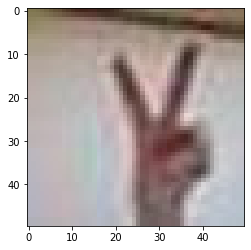

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

###### 딥러닝 네트워크 설계하기

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                123936    
_________________________________________________________________
dense_3 (Dense)              (

###### 딥러닝 네트워크 학습시키기

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
123/123 [==============================] - 1s 3ms/step - loss: 0.2934 - accuracy: 0.8961
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9882
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9987
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9995
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 8.0834e-04 - accuracy: 1.0000
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 4.8475e-04 - accuracy: 1.0000
Epoch 8/10
123/123 [==============================] - 0s 3ms/step - loss: 3.1204e-04 - accuracy: 1.0000
Epoch 9/10
123/123 [==============================] - 0s 3ms/step - loss: 2.3880e-04 - accuracy: 1.0000
Epoch 10/10
123/123 [==============================] - 0s 3ms/step - loss: 1.7750e-0

###### test 데이터 준비 + resize

In [19]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 50x50 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 test 완료!")
print("-------------------------------")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 50x50 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 test 완료!")
print("-------------------------------")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(50,50)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 test 완료!")

109  images to be resized.
109  images resized.
가위 이미지 test 완료!
-------------------------------
100  images to be resized.
100  images resized.
바위 이미지 test 완료!
-------------------------------
101  images to be resized.
101  images resized.
보 이미지 test 완료!


In [20]:
import numpy as np

def load_data(img_path, number_of_data=310):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=50
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))

테스트데이터(x_test)의 이미지 개수는 310 입니다.
x_test shape: (310, 50, 50, 3)


###### 딥러닝 네트워크 학습시키기

In [21]:
 print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 50, 50, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 50, 50, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (3907, 50, 50, 3)
Before Reshape - x_test_norm shape: (310, 50, 50, 3)
After Reshape - x_train_reshaped shape: (11721, 50, 50, 1)
After Reshape - x_test_reshaped shape: (930, 50, 50, 1)


###### 테스트 (평가)

In [22]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.3217 - accuracy: 0.6935
test_loss: 1.3216843605041504 
test_accuracy: 0.6935483813285828


## 회고

##### --- train 데이터 수(가위 : 100개, 바위 : 100개, 보 : 100개), 조원에게 받은 test 데이터 수 (가위 : 100개, 바위 : 100개, 보 : 100개) 각각 300개로 시작.
###### accuracy가 0.4
###### epoch와 target사이즈 변경에도 test_loss만 늘어나고 accuracy에는 영향을 미치지 않는 결과가 확인이 되었다.

##### ---epoch와 target size를 바꾸어도 변화가 없어서 데이터의 문제임을 의심했다. 
######  train 데이터 수를 늘리기도 결정(가위 : 300개, 바위 : 300개, 보 : 300개), test 데이터는 동일하게 진행.
######  accuracy는 동일하게 0.4

#### --- train 데이터 수를 더 많이 늘리기로 결정(가위 : 1000개, 바위 : 1000개, 보 : 1000개), test 데이터는 동일하게 진행
###### accuracy가 0.5로 오름

#### --- 데이터 수를 늘린 후에 accuracy가 올라감을 확인하고 더 늘리기로 결정
###### train 데이터 수 (가위 : 1300개, 바위 : 1300개, 보 : 1300개), test 데이터는 동일하게 진행
###### accuracy 0.61로 오름 !

#### --- 정확도를 더 늘리고 싶어서 다른 변화를 시도했음
###### target size(28x28)에서 target size (50x50)으로 변경
###### accuracy 0.69로 오름 !!!


######  데이터만의 문제라고 하기엔 무리가 있는 것 같다. 하지만 accuracy에 중요한 영향을 미치는 것은 데이터의 수, 그리고 데이터의 질임을 확인했음
###### accuracy에 영향을 미치는 것은 데이터 뿐만의 문제가 아닌 target size도 영향을 미친다고 함
###### 나는 컬러 이미지로 진행하였으나 흑백 이미지 역시 accuracy에 영향을 미치는 것을 알게 되었음
###### 앞으로 accuracy에 관해 문제가 발생한다면 데이터의 수 뿐만 아니라 다른 문제가 무엇인지 탐구해보고 싶음